<a href="https://colab.research.google.com/github/f1w2e3/ctpractice/blob/main/quick_sort_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 퀵 정렬 성능 비교 보고서 초안

## 개요

### I. 퀵 정렬을 구현하는 3가지 방법

- **In-place**
  - 호어(Hoare) 방식 – 메모리 추가 사용 ❌
  - 로무토(Lomuto) 방식 – 메모리 추가 사용 ❌
- **Not in-place**
  - 그 외의 방법 – 메모리 추가 사용 ⭕

### II. 퀵 정렬의 성능을 높이는 방법

- 3-median 방법
- Dual pivot 방법
- 3분할(three-way partitioning) 방법

---

## 본론

- I. 호어, 로무토 방법의 시간 측정
- II. 확률 기댓값 기반 3-median의 성능 분석
- III. Dual pivot의 시간복잡도 `k × log₃(n)` 분석


## 재귀 구조 예시 코드 (Python)

In [2]:
def swap(a, b):
    array[a], array[b] = array[b], array[a]

def quicksort(start, end, partition):
    if start >= end:
        return
    pivot = partition(start, end)
    quicksort(start, pivot - 1, partition)
    quicksort(pivot + 1, end, partition)

## 퀵 정렬 구현 - Hoare 방식

### 오름차순 정렬

In [3]:
def hoare_asc(start, end):
    left = start
    right = end
    pivot = start
    while True:
        while array[left] <= array[pivot] and left < right:
            left += 1
        while array[right] >= array[pivot] and left < right:
            right -= 1
        if left >= right:
            break
        swap(left, right)
    if array[pivot] > array[right]:
        swap(right, pivot)
    return right

### 내림차순 정렬

In [4]:
def hoare_desc(start, end):
    left = start
    right = end
    pivot = end
    while True:
        while array[left] >= array[pivot] and left < right:
            left += 1
        while array[right] <= array[pivot] and left < right:
            right -= 1
        if left >= right:
            break
        swap(left, right)
    if array[pivot] > array[left]:
        swap(left, pivot)
    return left

## 퀵 정렬 구현 - Lomuto 방식

### 오름차순 정렬

In [5]:
def lomuto_asc(start, end):
    i = start
    j = start
    pivot = start
    while j <= end - 1:
        j += 1
        while i < j and array[i] < array[pivot]:
            i += 1
        if array[j] < array[pivot]:
            swap(i, j)
    return i

### 내림차순 정렬

In [6]:
def lomuto_desc(start, end):
    i = start
    j = start
    pivot = start
    while j <= end - 1:
        j += 1
        while i < j and array[i] > array[pivot]:
            i += 1
        if array[j] > array[pivot]:
            swap(i, j)
    return i

## Hoare vs Lomuto 시간 비교 시각화

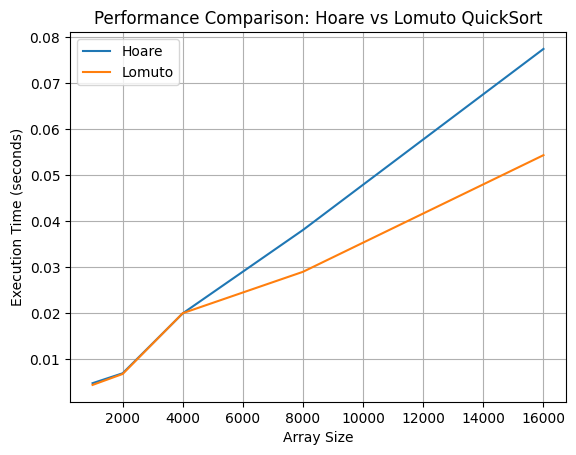

In [7]:
import time
import random
import matplotlib.pyplot as plt

# Global array
array = []

def swap(a, b):
    array[a], array[b] = array[b], array[a]

def quicksort(start, end, partition):
    if start >= end:
        return
    pivot = partition(start, end)
    quicksort(start, pivot - 1, partition)
    quicksort(pivot + 1, end, partition)

def hoare_asc(start, end):
    left = start
    right = end
    pivot = start
    while True:
        while array[left] <= array[pivot] and left < right:
            left += 1
        while array[right] >= array[pivot] and left < right:
            right -= 1
        if left >= right:
            break
        swap(left, right)
    if array[pivot] > array[right]:
        swap(right, pivot)
    return right

def lomuto_asc(start, end):
    pivot = end
    i = start - 1
    for j in range(start, end):
        if array[j] <= array[pivot]:
            i += 1
            swap(i, j)
    swap(i + 1, pivot)
    return i + 1

def generate_array(size):
    return [random.randint(0, 100000) for _ in range(size)]

def run_sort(sort_func, arr):
    global array
    array = arr.copy()
    start_time = time.time()
    quicksort(0, len(array) - 1, sort_func)
    return time.time() - start_time

sizes = [1000, 2000, 4000, 8000, 16000]
hoare_times = []
lomuto_times = []

for size in sizes:
    sample = generate_array(size)
    hoare_times.append(run_sort(hoare_asc, sample))
    lomuto_times.append(run_sort(lomuto_asc, sample))

plt.plot(sizes, hoare_times, label='Hoare')
plt.plot(sizes, lomuto_times, label='Lomuto')
plt.xlabel('Array Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Performance Comparison: Hoare vs Lomuto QuickSort')
plt.legend()
plt.grid(True)
plt.show()